<a href="https://colab.research.google.com/github/ard18/ratemaking-project/blob/main/Ratemaking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [ ]:
# HI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/Colab Notebooks/datasets/Project/worker-comp/wkcomp_pos.csv"

dataset = pd.DataFrame(pd.read_csv(filepath))
dataset

Mounted at /content/drive


,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_D,CumPaidLoss_D,BulkLoss_D,EarnedPremDIR_D,EarnedPremCeded_D,EarnedPremNet_D,Single,PostedReserve97_D
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,44300,Tower Ins Co Of NY,1997,2002,6,334,287,15,4387,3374,1013,1,1187
13196,44300,Tower Ins Co Of NY,1997,2003,7,318,293,2,4387,3374,1013,1,1187
13197,44300,Tower Ins Co Of NY,1997,2004,8,323,300,7,4387,3374,1013,1,1187
13198,44300,Tower Ins Co Of NY,1997,2005,9,310,297,0,4387,3374,1013,1,1187


In [ ]:
columns = dataset.columns
for i in columns:
    print(i,"\n")

GRCODE 

GRNAME 

AccidentYear 

DevelopmentYear 

DevelopmentLag 

IncurLoss_D 

CumPaidLoss_D 

BulkLoss_D 

EarnedPremDIR_D 

EarnedPremCeded_D 

EarnedPremNet_D 

Single 

PostedReserve97_D 



<ipython-input-4-a8476510fe54>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, linewidths=0.2, linecolor="black", fmt=".2f")


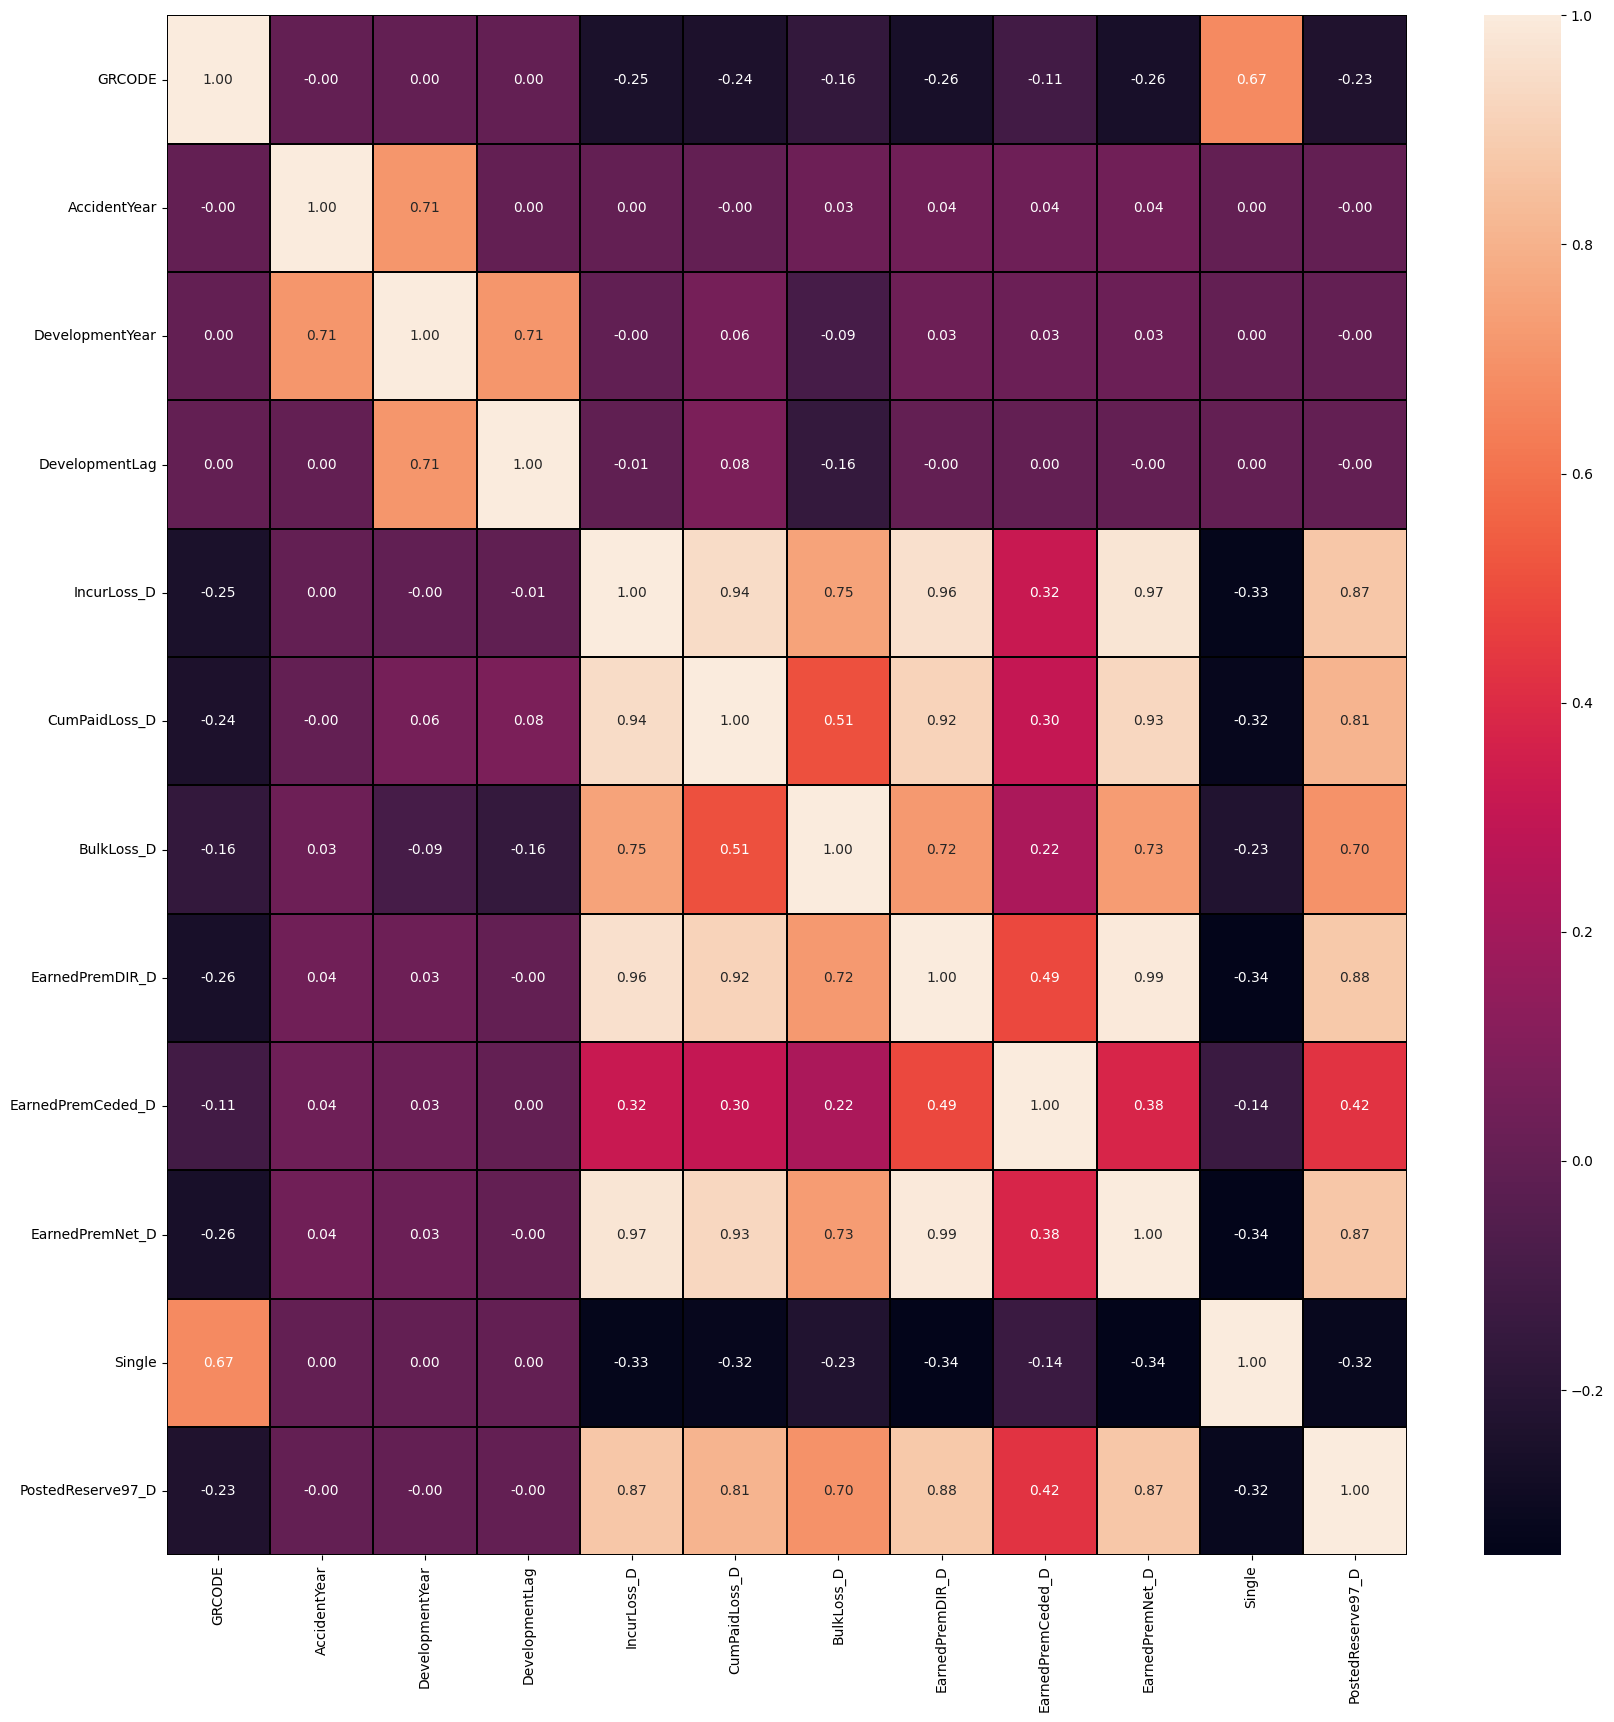

In [ ]:
# prompt: create a heatmap or correlation map for this dataset with proper spacing

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.2, linecolor="black", fmt=".2f")
plt.show()


In [ ]:
# no missing values
dataset.isnull().any()

GRCODE               False
GRNAME               False
AccidentYear         False
DevelopmentYear      False
DevelopmentLag       False
IncurLoss_D          False
CumPaidLoss_D        False
BulkLoss_D           False
EarnedPremDIR_D      False
EarnedPremCeded_D    False
EarnedPremNet_D      False
Single               False
PostedReserve97_D    False
dtype: bool

# Choose your Company using GRCODE

In [ ]:

dataset["GRCODE-GRNAME"] = dataset['GRCODE'].astype('str')+"-"+dataset['GRNAME']
companies = dataset["GRCODE-GRNAME"]
print(pd.unique(companies))

['86-Allstate Ins Co Grp' '337-California Cas Grp' '353-Celina Mut Grp'
 '388-Federal Ins Co Grp' '460-Buckeye Ins Grp' '655-FM Global'
 '671-Farm Bureau Of MI Grp' '711-Patrons Grp' '715-West Bend Mut Ins Grp'
 '965-Secura Ins Co' '1066-Island Ins Cos Grp'
 '1090-Kentucky Farm Bureau Mut Ins Grp' '1236-Shelter Ins Cos Grp'
 '1252-Penn Miller Grp' '1538-Farmers Automobile Grp'
 '1767-State Farm Mut Grp' '2135-Erie Ins Exchange Grp'
 '2143-Farmers Alliance Mut & Affiliates' '2623-Canal Ins Co Grp'
 '2712-Pennsylvania Natl Ins Grp' '3000-Horace Mann Grp'
 '3034-Preferred Risk Mut Grp' '3240-NC Farm Bureau Ins Grp'
 '4839-FL Farm Bureau Grp' '5010-Capitol Transamerican Grp'
 '5185-Grinnell Mut Grp' '5940-American Contractors Ins Grp'
 '6408-Mutual Benefit Grp' '6807-Amerisafe Grp'
 '7080-New Jersey Manufacturers Grp' '7714-Keystone Ins Grp'
 '8168-Commerce Grp Inc' '8427-Farm Bureau Grp'
 '8559-Millers Mut Ins Assoc' '8672-Protective Ins Grp'
 '9466-Lumber Ins Cos' '10011-Mada Ins Exchang

In [ ]:
slt_comp = 1767 #@param

# Function definitions for Loss Development

In [ ]:
class AveragingMethods:
    def __init__(self, data):
        '''Here, Data is of type list'''
        self.data = data
    def SimpleAvg(self):
        sum = 0
        for i in self.data:
            sum += i
        return round( sum/len(self.data), 4)
    def VolumeAvg(self, dt1, dt2):
        sum1 = 0
        for i in dt1:
            sum1 += i
        sum2 = 0
        for j in dt2:
            sum2 += j
        return round( sum1/sum2,4)
    def MedialAvg(self):
        minimum = min(self.data)
        maximum = max(self.data)
        sum = 0
        if len(self.data) > 2:
            for i in self.data:
                sum += i
            sum -= (maximum+minimum)
            return round( sum/(len(self.data)-2),4)
        else:
            return  round( (maximum+minimum)/2,4)
    def GeometricAvg(self):
        sum = 1
        for i in self.data:
            sum *= i
        return round( sum**(1/len(self.data)),4)


def LossData(grcode):
    '''This function extracts the loss data of a specific company corresponding to its GRCODE
        Here data is of type: dataframe'''
    company = dataset[dataset["GRCODE"]==grcode]
    return(company)


def createLossTriangle(data):
    '''This function extracts and creates Loss triangles
        Here data is of type: dataframe'''
    trframe = {}      # dict containing loss triangle values for various accident years
    for i in range(1988,1998):
        L = []
        for j in range(i,1998):
            condition = ( (data['AccidentYear']==i) & (data['DevelopmentYear']==j) )
            #print(int(data.loc[condition]['CumPaidLoss_D']))
            L.append(int(data.loc[condition]['CumPaidLoss_D']))
        i = int(i)
        trframe[i] = L
    return trframe


def displayTriangleData(data):
    '''This function displays Loss Triangle data
       Here data is of type: dictionary'''
    for i in data.keys():
        print(i, end = "\t\t")
        for j in data[i]:
            print(j, end = "\t")
        print("\n")


def computeLDF(data):
    '''This function computes Loss Development Factors
       Here data is of type: dictionary'''
    trframe = {}
    for i in data.keys():
        L = []
        for j in range(len(data[i])-1):
            ldf = data[i][j+1]/data[i][j]
            L.append( round(ldf,4) )
        i = int(i)
        trframe[i] = L
    return trframe


def computeAverageLDF(ldf_info, loss_info):
    '''This function computes various Averages of Loss Development Factors
       Here data is of type: dictionary'''
    print("Available averaging methods:\n\
            1. Simple Average :- Latest 5\n\
            2. Volume-Weighted Average :- Latest 5\n\
            3. Medial Average :- Latest 5\n\
            4. Geometric Average :- Latest 5\n")
    DK = list(ldf_info.keys())
    DK = sorted(DK, reverse=True)
    trframe = {
        'SimpleAvg':[],
        'VolumeAvg':[],
        'MedialAvg':[],
        'GeometricAvg':[]
    }
    # for Medial, Simple and Geometric Averages
    for i in range(0,10):
        L = []
        c = 1
        for j in DK:
            try:    # to avoid Index Out of Bounds
                if ldf_info[j][i] and c<=5:
                    L.append(ldf_info[j][i])
                    c+=1
            except:
                pass
        if(L!=[]):
            obj = AveragingMethods(L)               # object of class Averaging methods
            simp_avg = obj.SimpleAvg()
            med_avg  = obj.MedialAvg()
            geo_avg  = obj.GeometricAvg()
            trframe['SimpleAvg'].append(simp_avg)
            trframe['MedialAvg'].append(med_avg)
            trframe['GeometricAvg'].append(geo_avg)
    # only for Volume-Weighted Average
    for i in range(1,10):
        L1 = []
        L2 = []
        c = 1
        for j in DK:
            try:
                if loss_info[j][i] and loss_info[j][i-1] and c<=5:
                    L1.append(loss_info[j][i])
                    L2.append(loss_info[j][i-1])
                    c+=1
            except:
                pass
        if(L1!=[] and L2!=[]):
            obj = AveragingMethods(L1)
            vol_avg = obj.VolumeAvg(L1, L2)
            trframe['VolumeAvg'].append(vol_avg)
    return trframe




loss_data = LossData(slt_comp)

print("Loss Development Triangle\n")
loss_triangle = createLossTriangle(loss_data)
displayTriangleData(loss_triangle)
print("\n")

print("Loss Development Factors (Age-to-Age factors)\n")
ldf_triangle = computeLDF(loss_triangle)
displayTriangleData(ldf_triangle)
print("\n")

avg_ldf = computeAverageLDF(ldf_triangle, loss_triangle)
for i in avg_ldf.keys():
    print(i,"\t",avg_ldf[i],"\n")

Loss Development Triangle

1988		22190	60834	85104	100151	108812	114967	118790	121558	123492	125049	

1989		26542	77798	106407	122422	133359	138599	143029	145712	147358	

1990		32977	100494	134886	157758	168991	178065	182787	187760	

1991		38604	114428	157103	181322	197411	208804	213396	

1992		42466	125820	164776	189045	204377	213904	

1993		46447	116764	154897	179419	193676	

1994		41368	100344	132021	151081	

1995		35719	83216	111268	

1996		28746	66033	

1997		25265	



Loss Development Factors (Age-to-Age factors)

1988		2.7415	1.399	1.1768	1.0865	1.0566	1.0333	1.0233	1.0159	1.0126	

1989		2.9311	1.3677	1.1505	1.0893	1.0393	1.032	1.0188	1.0113	

1990		3.0474	1.3422	1.1696	1.0712	1.0537	1.0265	1.0272	

1991		2.9641	1.3729	1.1542	1.0887	1.0577	1.022	

1992		2.9628	1.3096	1.1473	1.0811	1.0466	

1993		2.5139	1.3266	1.1583	1.0795	

1994		2.4256	1.3157	1.1444	

1995		2.3297	1.3371	

1996		2.2971	

1997		



Available averaging methods:
            1. Simple Average :- Latest 5
         

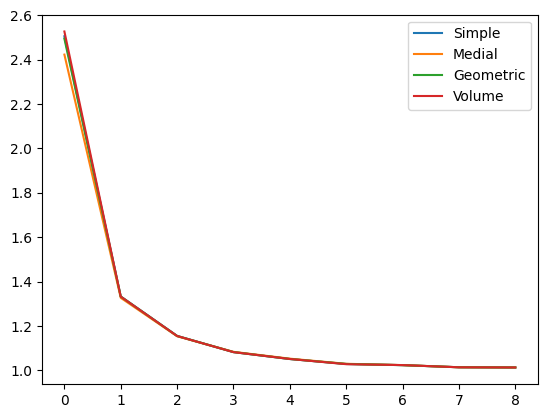

In [ ]:
plt.plot(avg_ldf['SimpleAvg'])
plt.plot(avg_ldf['MedialAvg'])
plt.plot(avg_ldf['GeometricAvg'])
plt.plot(avg_ldf['VolumeAvg'])

plt.legend( ['Simple','Medial','Geometric','Volume'] , loc='upper right')

In [ ]:
# Select LDF
selected_Ldf = avg_ldf['VolumeAvg']
print("Selected LDF (from Volume-Weighted Averages):\n",selected_Ldf)

#Tail factor
tail = 1.0000
selected_Ldf.append(tail)

# Cumulative Loss Development factors
cdf = []
f = 1
selected_Ldf = sorted( selected_Ldf, reverse=False)
for i in range(1, len(selected_Ldf)+1):
    f = 1
    for j in range(0, i):
        f*=selected_Ldf[j]
    cdf.append( round( f,4) )

print("\nCumulative Development Factor (CDF):\n", sorted(cdf, reverse=True))


Selected LDF (from Volume-Weighted Averages):
 [2.5273, 1.332, 1.1546, 1.0817, 1.0509, 1.0274, 1.0234, 1.0134, 1.0126]

Cumulative Development Factor (CDF):
 [4.7672, 1.8863, 1.4161, 1.2265, 1.1339, 1.079, 1.0502, 1.0262, 1.0126, 1.0]


In [ ]:
# Projected Ultimate Losses
proj_ultLosses = {}
for i in range(0, len(cdf)):
    for j in range(0, len(loss_triangle)):
        if(i==j):
            proj_ultLosses[ list(loss_triangle.keys())[j] ] = round( list(loss_triangle.values())[i][-1]*cdf[i],4)
print("Projected Ulimate Losses\n")
for i in proj_ultLosses.keys():
    print(i,"\t==>",proj_ultLosses[i])

Projected Ulimate Losses

1988 	==> 125049.0
1989 	==> 149214.7108
1990 	==> 192679.312
1991 	==> 224108.4792
1992 	==> 230802.416
1993 	==> 219609.2164
1994 	==> 185300.8465
1995 	==> 157566.6148
1996 	==> 124558.0479
1997 	==> 120443.308


In [ ]:
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2
# Actual Ultimate Losses
act_ultLosses = {}
for i in range(1988,1998):
        condition = ( (loss_data['AccidentYear']==i) & (loss_data['DevelopmentLag']==10) )
        act_ultLosses[i] = int( loss_data.loc[condition]['CumPaidLoss_D'])
print("Actual Ulimate Losses\n")
for i in act_ultLosses.keys():
    print(i,"\t==>",act_ultLosses[i])

print( "\nMean Absolute Error =",mae(list(act_ultLosses.values()), list(proj_ultLosses.values())) )
print("\nR^2 coefficient =", r2(list(act_ultLosses.values()), list(proj_ultLosses.values()) ) )

Actual Ulimate Losses

1988 	==> 125049
1989 	==> 149252
1990 	==> 196092
1991 	==> 229642
1992 	==> 235831
1993 	==> 224868
1994 	==> 190572
1995 	==> 153299
1996 	==> 126403
1997 	==> 111592

Mean Absolute Error = 3950.5893999999985

R^2 coefficient = 0.9887770491495739


# Inspiration for Rate Adjustment Factors

In [ ]:
import datetime
T = 1; E = 1;
start_date = datetime.date(2015,1,1)
rate_date = datetime.date(2015,4,1)

def months_between(date1,date2):

    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2

    return months/12

D = months_between(rate_date, start_date)

A = D+T
B = max( A-E, 0 )
C = max( D, 0 )

P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
P


0.28125

In [ ]:
rate_changes = {
            datetime.date(2015,4,1):0.05, datetime.date(2016,1,1):0.1,
                datetime.date(2017,7,1):-0.02,
                }
earned_prem = {2015: 20400, 2016: 21000, 2017: 22800, 2018: 23200}

# first calculate the rate change indeces
rates = list(rate_changes.values())
rate_index =[1.00]+[ (1+i) for i in rates ] # including initial index without changes = 1.00 (rate change = 0%)
print("Rate change indeces:\n",rate_index)
cum_index = []
f = 1
for i in rate_index:
    f *= i
    cum_index.append( round(f, 4))
print("Cumulative rate change indeces:\n",cum_index)
current_cum_rate_index = cum_index[-1]

Rate change indeces:
 [1.0, 1.05, 1.1, 0.98]
Cumulative rate change indeces:
 [1.0, 1.05, 1.155, 1.1319]


In [ ]:
import datetime
T = 1; E = 1;

def months_between(date1,date2):

    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2

    return months/12



def find_remains(L):
    if L!=[]:
        L.append(0)
        to_return = []
        max = 1
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        to_return.pop()
        return to_return




def earnedPortion(rate_dates, earned_prem_years):

    portion = {}
    for i in earned_prem_years:
        portion[i] = []
    for i in earned_prem_years:
        start_date = datetime.date(i,1,1)
        for j in rate_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:

                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)


    for i in portion.keys():
        portion[i] = find_remains(portion[i])
    return(portion)


rate_effec_dates = list( rate_changes.keys())
years_toAdjust = list( earned_prem.keys() )
earned_PremPortion = earnedPortion(rate_effec_dates, years_toAdjust)
print("The portion earned by the premium in the years w.r.t. the rate changes are:\n",earned_PremPortion)

The portion earned by the premium in the years w.r.t. the rate changes are:
 {2015: [0.71875, 0.28125, 0, 0], 2016: [0.03125, 0.46875, 0.5, 0], 2017: [0, 0, 0.875, 0.125], 2018: [0, 0, 0.125, 0.875]}


In [ ]:
# Average Cumulative Rate Level Indices

def AvgCumulIndices(L, cumul_indices):
    prod = L*cumul_indices
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

for i in earned_PremPortion.keys():
    earned_PremPortion[i] = np.array(earned_PremPortion[i])
cum_index = np.array(cum_index)

avg_CumulIndices = {}
for i in earned_PremPortion.keys():
    avg_CumulIndices[i] = AvgCumulIndices(earned_PremPortion[i], cum_index)

print("The average cumulative rate level indices are:\n",avg_CumulIndices)


The average cumulative rate level indices are:
 {2015: 1.01406, 2016: 1.10094, 2017: 1.15211, 2018: 1.13479}


In [ ]:
# Finally, On-Level Factors
onlevel = {}
for i in avg_CumulIndices.keys():
    onlevel[i] = round( current_cum_rate_index/avg_CumulIndices[i], 5 )
print("On-Level Factors for premium:\n",onlevel)

On-Level Factors for premium:
 {2015: 1.11621, 2016: 1.02812, 2017: 0.98246, 2018: 0.99745}


# Adjusting Premiums for Rate Changes


In [ ]:
net_prem_earned = {}
for i in range(1988,1998):
    net_prem_earned[i] = list( loss_data[loss_data['AccidentYear']==i]['EarnedPremNet_D'] )[0]

print("Net Premium Earned\n")
for i in net_prem_earned.keys():
    print(i,"\t==>",net_prem_earned[i])

Net Premium Earned

1988 	==> 177104
1989 	==> 201118
1990 	==> 246010
1991 	==> 286019
1992 	==> 340183
1993 	==> 418755
1994 	==> 366031
1995 	==> 338186
1996 	==> 286631
1997 	==> 245378


Assume some rate changes

In [ ]:
# Assume rate changes
rate_changes = {
            datetime.date(1988,4,1):0.05, #datetime.date(1989,1,1):0.1,
                datetime.date(1990,7,1):-0.02, #datetime.date(1991,4,1):-0.04,
            datetime.date(1991,5,1):0.11,  #datetime.date(1992,3,1):0.07,
            datetime.date(1993,8,1):-0.05, #datetime.date(1994,2,1):0.08,
            datetime.date(1996,8,1):0.15
                }
# first calculate the rate change indeces
rates = list(rate_changes.values())
rate_index =[1.00]+[ (1+i) for i in rates ] # including initial index without changes = 1.00 (rate change = 0%)
print("Rate change indeces:\n",rate_index)
cum_index = []
f = 1
for i in rate_index:
    f *= i
    cum_index.append( round(f, 4))
print("Cumulative rate change indeces:\n",cum_index)
current_cum_rate_index = cum_index[-1]
print("Current Cumulative Rate Level Index =",current_cum_rate_index)

Rate change indeces:
 [1.0, 1.05, 0.98, 1.11, 0.95, 1.15]
Cumulative rate change indeces:
 [1.0, 1.05, 1.029, 1.1422, 1.0851, 1.2478]
Current Cumulative Rate Level Index = 1.2478


In [ ]:
import datetime
T = 1; E = 1;

def months_between(date1,date2):
    '''This function calculates the difference between 2 given dates in months
    date1, date2 are in datetime.date() format'''
    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2    # difference between the dates

    return months/12



def find_remains(rate_dates, earned_prem_year, L):
    '''This function calculates the remaining portions of earned premium under the rate changes
       rate_dates is a dictionary containing the dates of rate changes, earned_prem_year is the year whose premiums are being adjusted, L is a list'''
    if L!=[]:
        L.append(0) # appending 0 as a means for calculating the last portion
        to_return = []  # the list that contains the portions
        max = 1 # maximum value (total area of an year of earned premium)
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]   # calculate remaining portion
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:   # for the last portion to be appended
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        if to_return.count(0) == len(to_return):
            to_return = earnedPortion_ForUnaffectedYear(rate_dates, earned_prem_year, to_return)

        to_return.pop()
        return to_return



def earnedPortion_ForUnaffectedYear(rate_dates, earned_prem_year, L):
    '''This function sets the portion earned by premium for that year as 1 if there are no rate changes affecting that year
    rate_dates is a dictionary containing the dates of rate changes, earned_prem_year is the year whose premiums are being adjusted, L is a list'''
    c = 0
    start_date = datetime.date(earned_prem_year,1,1)
    for i in rate_dates:
        if( months_between(i, start_date)>0 ):      # checking where to insert 1
            break
        else:
            c+=1
    L.insert(c,1)   # insert 1 as portion earned by premium
    return L



def earnedPortion(rate_dates, earned_prem_years):
    '''This function calculates the portion of earned premium under given rate changes
    rate_dates is a dictionary containing the dates of rate changes and earned_prem_years is also a dictionary containing the years in which premium is earned'''
    portion = {}
    for i in earned_prem_years:
        portion[i] = []
    for i in earned_prem_years:
        start_date = datetime.date(i,1,1)
        for j in rate_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:
                # algorithm for calculating portions of earned premium
                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)

    # print(portion)
    for i in portion.keys():
        portion[i] = find_remains(rate_dates, i, portion[i])
    return(portion)


rate_effec_dates = list( rate_changes.keys())
years_toAdjust = list( net_prem_earned.keys() )
earned_NetPremPortion = earnedPortion(rate_effec_dates, years_toAdjust)
print("The portion earned by the premium in the years w.r.t. the rate changes are:\n",earned_NetPremPortion)

The portion earned by the premium in the years w.r.t. the rate changes are:
 {1988: [0.71875, 0.28125, 0, 0, 0, 0], 1989: [0.03125, 0.96875, 0, 0, 0, 0], 1990: [0, 0.875, 0.125, 0, 0, 0], 1991: [0, 0.125, 0.65278, 0.22222, 0, 0], 1992: [0, 0, 0.05556, 0.94444, 0, 0], 1993: [0, 0, 0, 0.91319, 0.08681, 0], 1994: [0, 0, 0, 0.17014, 0.82986, 0], 1995: [0, 0, 0, 0, 1, 0], 1996: [0, 0, 0, 0, 0.91319, 0.08681], 1997: [0, 0, 0, 0, 0.17014, 0.82986]}


In [ ]:
# Average Cumulative Rate Level Indices

def AvgCumulIndices(L, cumul_indices):
    '''This function calculates the average cumulative rate level indices for the earned premium
    L, cumul_indices are numpy arrays where L contains the portions of earned premiums and cumul_indices contains the cumulative rate level indices'''
    prod = L*cumul_indices
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

for i in earned_NetPremPortion.keys():
    earned_NetPremPortion[i] = np.array(earned_NetPremPortion[i])
cum_index = np.array(cum_index)

avg_CumulIndices = {}
for i in earned_NetPremPortion.keys():
    avg_CumulIndices[i] = AvgCumulIndices(earned_NetPremPortion[i], cum_index)

print("\nThe Average Cumulative Rate Level Indices are:")
for i in avg_CumulIndices.keys():
    print(i,"\t==>",avg_CumulIndices[i])


The Average Cumulative Rate Level Indices are:
1988 	==> 1.01406
1989 	==> 1.04844
1990 	==> 1.04738
1991 	==> 1.05678
1992 	==> 1.13591
1993 	==> 1.13724
1994 	==> 1.09481
1995 	==> 1.0851
1996 	==> 1.09922
1997 	==> 1.22012


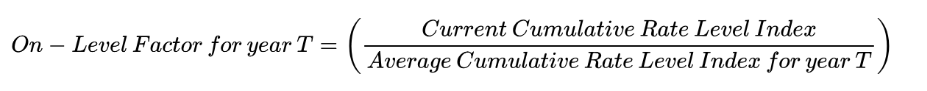

In [ ]:
# Finally, On-Level Factors
onlevel = {}
print("Current Cumulative Rate Level Index =",current_cum_rate_index)
for i in avg_CumulIndices.keys():
    onlevel[i] = round( current_cum_rate_index/avg_CumulIndices[i], 5 )
print("\nThe On-Level Factors are:")
for i in onlevel.keys():
    print(i,"\t==>",onlevel[i])

Current Cumulative Rate Level Index = 1.2478

The On-Level Factors are:
1988 	==> 1.2305
1989 	==> 1.19015
1990 	==> 1.19135
1991 	==> 1.18076
1992 	==> 1.0985
1993 	==> 1.09722
1994 	==> 1.13974
1995 	==> 1.14994
1996 	==> 1.13517
1997 	==> 1.02269


In [ ]:
# On-Leveling the Premiums
onLevelPrem = {}
for i in onlevel.keys():
    onLevelPrem[i] = round( net_prem_earned[i] * onlevel[i], 5)
print("The On-Level Premiums are:\n")
for i in onLevelPrem.keys():
    print(i,"\t==>",onLevelPrem[i])

The On-Level Premiums are:

1988 	==> 217926.472
1989 	==> 239360.5877
1990 	==> 293084.0135
1991 	==> 337719.79444
1992 	==> 373691.0255
1993 	==> 459466.3611
1994 	==> 417180.17194
1995 	==> 388893.60884
1996 	==> 325374.91227
1997 	==> 250945.62682


# Adjusting Losses for Benefit Changes

In [ ]:
# Assume benefit changes
benefit_changes = {
            datetime.date(1988,4,1):0.05,
            #     datetime.date(1989,1,1):0.1,
            datetime.date(1990,7,1):-0.02,
            #     datetime.date(1991,4,1):-0.04,
            datetime.date(1991,5,1):0.11,
            #     datetime.date(1992,3,1):0.07,
            datetime.date(1993,8,1):-0.05,
            #     datetime.date(1994,2,1):0.08,
            datetime.date(1996,8,1):0.15
                }
# first calculate the benefit change indeces
benefits = list(benefit_changes.values())
benefit_index =[1.00]+[ (1+i) for i in benefits ] # including initial index without changes = 1.00 (rate change = 0%)
print("Benefit change indeces:\n",benefit_index)
loss_lvl = []
f = 1
for i in benefit_index:
    f *= i
    loss_lvl.append( round(f, 4))
print("Loss Level indeces:\n",loss_lvl)
current_loss_lvl = loss_lvl[-1]
print("Current Loss Level =",current_loss_lvl)

Benefit change indeces:
 [1.0, 1.05, 0.98, 1.11, 0.95, 1.15]
Loss Level indeces:
 [1.0, 1.05, 1.029, 1.1422, 1.0851, 1.2478]
Current Loss Level = 1.2478


In [ ]:
import datetime
T = 1; E = 1;

def months_between(date1,date2):
    '''This function calculates the difference between 2 given dates in months
    date1, date2 are in datetime.date() format'''
    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2    # difference between the dates

    return months/12



def find_remains(ben_dates, loss_year, L):
    '''This function calculates the remaining portions of earned premium under the rate changes
       ben_dates is a list containing the dates of benefit changes, loss_year is the year whose losses are being adjusted, L is a list'''
    if L!=[]:
        L.append(0) # appending 0 as a means for calculating the last portion
        to_return = []  # the list that contains the portions
        max = 1 # maximum value (total area of an year of losses)
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]   # calculate remaining portion
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:   # for the last portion to be appended
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        if to_return.count(0) == len(to_return):
            to_return = Portion_ForUnaffectedYear(ben_dates, loss_year, to_return)

        to_return.pop()
        return to_return



def Portion_ForUnaffectedYear(ben_dates, loss_year, L):
    '''This function sets the portion earned by premium for that year as 1 if there are no rate changes affecting that year
    ben_dates is a list containing the dates of benefit changes, loss_year is the year whose losses are being adjusted, L is a list'''
    c = 0
    start_date = datetime.date(loss_year,1,1)
    for i in ben_dates:
        if( months_between(i, start_date)>0 ):      # checking where to insert 1
            break
        else:
            c+=1
    L.insert(c,1)   # insert 1 as portion earned by premium
    return L



def LossPortion(ben_dates, loss_years):
    '''This function calculates the portion of earned premium under given rate changes
    ben_dates is a list containing the dates of benefit changes and loss_years is also a list containing the years in which losses occur'''
    portion = {}
    for i in loss_years:
        portion[i] = []
    for i in loss_years:
        start_date = datetime.date(i,1,1)
        for j in ben_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:
                # algorithm for calculating portions of earned premium
                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)

    # print(portion)
    for i in portion.keys():
        portion[i] = find_remains(ben_dates, i, portion[i])
    return(portion)


ben_effec_dates = list( benefit_changes.keys())
years_toAdjust = list( proj_ultLosses.keys() )
LossesPortion = LossPortion(ben_effec_dates, years_toAdjust)
print("The portion of the losses in the years w.r.t. the benefit changes are:\n",LossesPortion)

The portion of the losses in the years w.r.t. the benefit changes are:
 {1988: [0.71875, 0.28125, 0, 0, 0, 0], 1989: [0.03125, 0.96875, 0, 0, 0, 0], 1990: [0, 0.875, 0.125, 0, 0, 0], 1991: [0, 0.125, 0.65278, 0.22222, 0, 0], 1992: [0, 0, 0.05556, 0.94444, 0, 0], 1993: [0, 0, 0, 0.91319, 0.08681, 0], 1994: [0, 0, 0, 0.17014, 0.82986, 0], 1995: [0, 0, 0, 0, 1, 0], 1996: [0, 0, 0, 0, 0.91319, 0.08681], 1997: [0, 0, 0, 0, 0.17014, 0.82986]}


In [ ]:
# Average Loss Levels

def AvgLossLevel(L, loss_levels):
    '''This function calculates the average Loss levels for the historical periods
    L, loss_levels are numpy arrays where L contains the portions of losses and loss_levels contains the loss levels'''
    prod = L*loss_levels
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

for i in LossesPortion.keys():
    LossesPortion[i] = np.array(LossesPortion[i])
loss_lvl = np.array(loss_lvl)

avg_LossLvl = {}
for i in LossesPortion.keys():
    avg_LossLvl[i] = AvgLossLevel(LossesPortion[i], loss_lvl)

print("\nThe Average Loss Levels are:")
for i in avg_LossLvl.keys():
    print(i,"\t==>",avg_LossLvl[i])


The Average Loss Levels are:
1988 	==> 1.01406
1989 	==> 1.04844
1990 	==> 1.04738
1991 	==> 1.05678
1992 	==> 1.13591
1993 	==> 1.13724
1994 	==> 1.09481
1995 	==> 1.0851
1996 	==> 1.09922
1997 	==> 1.22012


In [ ]:
# Finally, Adjustment Factors
adjusts = {}
print("Current Loss Level =",current_loss_lvl)
for i in avg_LossLvl.keys():
    adjusts[i] = round( current_loss_lvl/avg_LossLvl[i], 5 )
print("\nThe Adjustment Factors are:")
for i in adjusts.keys():
    print(i,"\t==>",adjusts[i])

Current Loss Level = 1.2478

The Adjustment Factors are:
1988 	==> 1.2305
1989 	==> 1.19015
1990 	==> 1.19135
1991 	==> 1.18076
1992 	==> 1.0985
1993 	==> 1.09722
1994 	==> 1.13974
1995 	==> 1.14994
1996 	==> 1.13517
1997 	==> 1.02269


In [ ]:
# Adjusting the Losses
AdjustedLosses = {}
for i in adjusts.keys():
    AdjustedLosses[i] = round( proj_ultLosses[i] * adjusts[i], 5)
print("The Adjusted Losses are:\n")
for i in AdjustedLosses.keys():
    print(i,"\t==>",AdjustedLosses[i])

The Adjusted Losses are:

1988 	==> 153872.7945
1989 	==> 177587.88806
1990 	==> 229548.49835
1991 	==> 264618.3279
1992 	==> 253536.45398
1993 	==> 240959.62442
1994 	==> 211194.78679
1995 	==> 181192.15302
1996 	==> 141394.55923
1997 	==> 123176.16666


# Trending Loss Ratios

In [ ]:
np_loss = []
for i in AdjustedLosses.values():
    np_loss.append(i)
np_prem = []
for i in onLevelPrem.values():
    np_prem.append(i)

np_loss = np.array(np_loss)
np_prem = np.array(np_prem)

np_LossRatio = np_loss/np_prem

print("The Loss ratios are",np_LossRatio)

The Loss ratios are [0.70607666 0.74192619 0.7832174  0.78354403 0.67846546 0.52443366
 0.50624359 0.46591702 0.43455889 0.49084803]


# Expenses and Profits

# Overall Rate indication

# Predictive Analytics